<a href="https://colab.research.google.com/github/JamesYang76/LossZero/blob/motor/motor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motorcycle Night Ride (Semantic Segmentation)

https://learn.modulabs.co.kr/camp/13/course/1857/node-version/3732/steps/18499

In [1]:
# 2026.2.10

## 1. Kaggle API 설정 (최초 1회)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls -a

.  ..  .config	drive  sample_data


In [4]:
!pwd

/content


In [8]:
%cd /content

/content


In [10]:
# Colab/Jupyter에서 실행
!pip install kaggle

# Kaggle API 토큰 다운로드
# 1. https://www.kaggle.com/settings/account → Create New Token
# 2. ~/.kaggle/kaggle.json 업로드
from google.colab import files
files.upload()  # kaggle.json 업로드
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


## 2. 데이터셋 다운로드

In [12]:
import os
import shutil
import json
import zipfile
import kagglehub

In [13]:
# Download latest version
path = kagglehub.dataset_download("mehmetcubukcu/commaaicomplete")

print("Path to dataset files:", path)


100%|██████████| 6.58G/6.58G [01:21<00:00, 86.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mehmetcubukcu/commaaicomplete/versions/1


In [14]:
import os
path = "/root/.cache/kagglehub/datasets/mehmetcubukcu/commaaicomplete/versions/1"

print("📁 데이터셋 구조:")
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # 처음 5개만
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... {len(files)-5} more files')


📁 데이터셋 구조:
1/
  comma10k/
    imgs/
      3019_0812e2149c1b5609_2018-10-02--11-16-42_24_587.png
      0720_a61a3fdda26c5345_2018-10-16--14-35-02_71_442.png
      4117_6c7ffc65dfef4e01_2018-08-24--02-27-40_25_530.png
      6436_5e6e36479611f322_2019-05-21--14-55-16_28_372.png
      h114_a3eaac81ac3ff81d_2019-02-12--19-12-09_21_57.png
      ... 9883 more files
    masks/
      3019_0812e2149c1b5609_2018-10-02--11-16-42_24_587.png
      0720_a61a3fdda26c5345_2018-10-16--14-35-02_71_442.png
      4117_6c7ffc65dfef4e01_2018-08-24--02-27-40_25_530.png
      6436_5e6e36479611f322_2019-05-21--14-55-16_28_372.png
      h114_a3eaac81ac3ff81d_2019-02-12--19-12-09_21_57.png
      ... 9883 more files


In [16]:
# Drive 목표 경로 생성
drive_path = '/content/drive/MyDrive/car_image'
os.makedirs(drive_path, exist_ok=True)

# 복사 실행
print("데이터셋 복사 중...")
shutil.copytree(path, drive_path, dirs_exist_ok=True)

print(f"복사 완료!")
print(f"목표 경로: {drive_path}")
os.system(f'ls -la "{drive_path}" | head -20')

데이터셋 복사 중...
복사 완료!
목표 경로: /content/drive/MyDrive/car_image


0

샘플 이미지 파일 1개씩 확인:


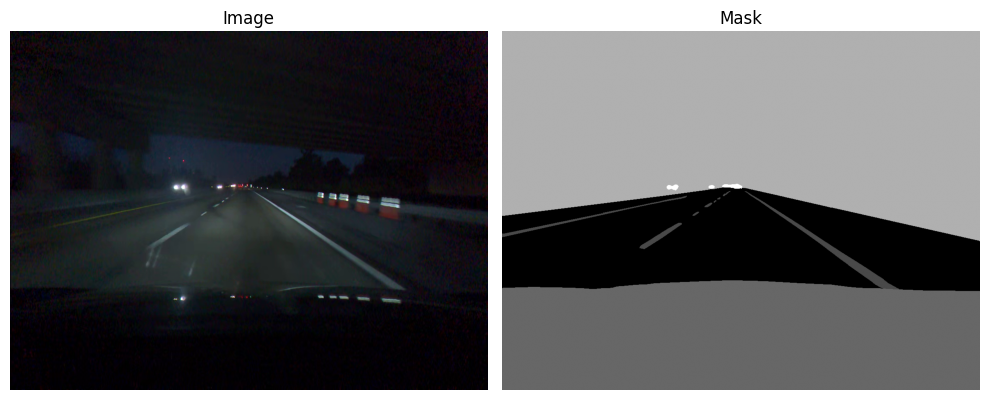

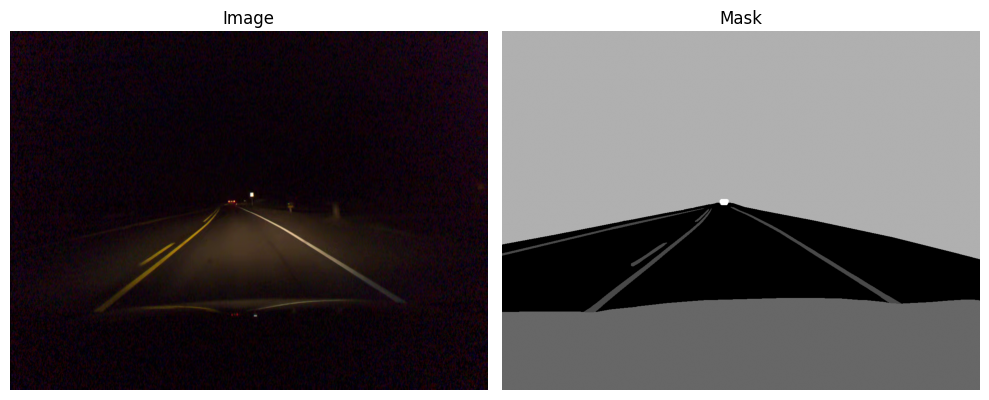

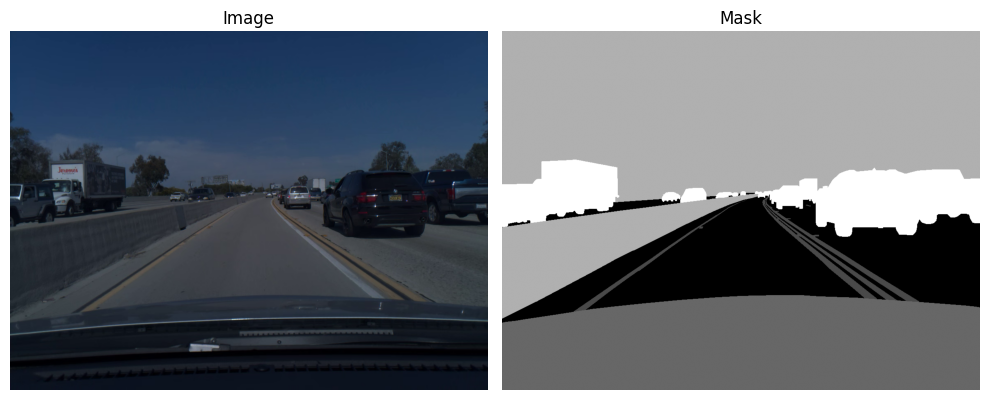

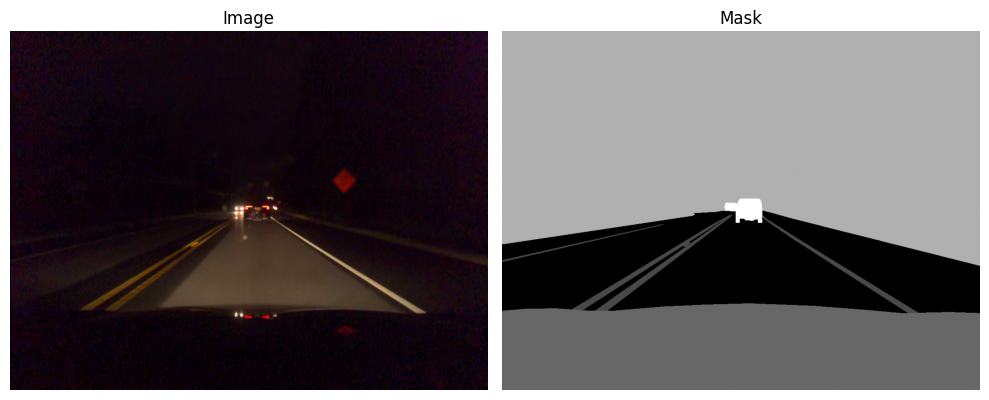

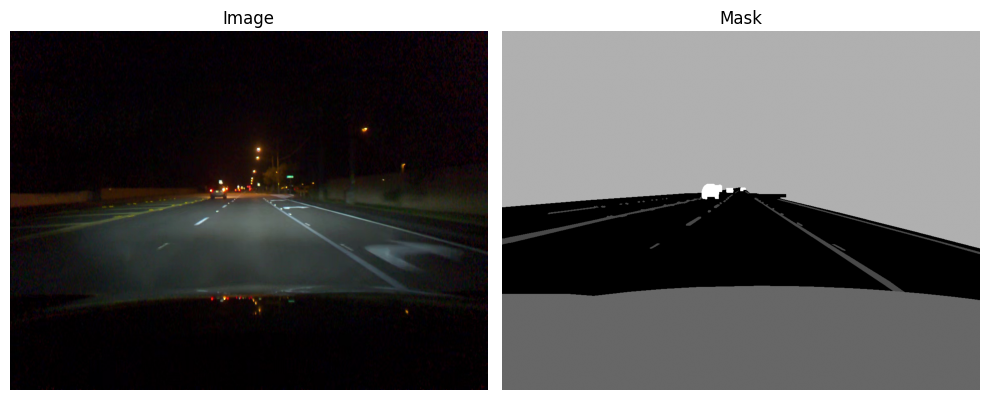

In [29]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# path = "/root/.cache/kagglehub/datasets/mehmetcubukcu/commaaicomplete/versions/1"
# img_dir = os.path.join(path, "1/comma10k/imgs")
# mask_dir = os.path.join(path, "1/comma10k/masks")

path = "/content/drive/MyDrive/car_image/comma10k"
img_dir = os.path.join(path, "imgs")
mask_dir = os.path.join(path, "masks")

sample_names = [
    "0001_a23b0de0bc12dcba_2018-06-24--00-29-19_17_79.png",
    "0003_97a4ec76e41e8853_2018-09-29--22-46-37_5_585.png",
    "0005_836d09212ac1b8fa_2018-06-15--15-57-15_23_345.png",
    "0014_c4289221cf16a21c_2018-09-17--19-49-26_23_349.png",
    "0028_8819eca74f12f21f_2018-08-20--00-41-09_6_862.png",
]

print("샘플 이미지 파일 1개씩 확인:")
for name in sample_names:
    img_path = os.path.join(img_dir, name)
    mask_path = os.path.join(mask_dir, name)

    if os.path.exists(img_path) and os.path.exists(mask_path):
        # print(f"Image: {img_path}")
        # print(f"Mask : {mask_path}\n")

        img  = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # grayscale

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        axs[0].imshow(img)
        axs[0].set_title("Image")
        axs[0].axis("off")

        axs[1].imshow(mask, cmap="gray")
        axs[1].set_title("Mask")
        axs[1].axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print(f"파일이 없음: {name}")

In [24]:
%cd /content/drive/MyDrive/car_image/comma10k/imgs

/content/drive/MyDrive/car_image/comma10k/imgs


In [25]:
!ls

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4888_088376fd1d121661_2018-05-19--15-39-25_20_1129.png
4889_ef53f1ffea65e93c_2018-10-11--18-51-43_6_780.png
4890_5948c4bc4f870bc7_2018-06-17--17-22-44_26_692.png
4891_a8c2c0db11b57616_2018-08-06--20-22-34_23_591.png
4892_aee00e7a217cbe97_2018-09-22--14-19-14_7_588.png
4893_92c1e126f0e52b85_2018-06-16--16-15-03_11_319.png
4894_3dad3b1439b2aa5c_2018-06-27--04-16-03_8_385.png
4895_2a6d6ba03fb9c4dc_2018-05-06--10-35-56_17_899.png
4896_e16fb3d63e3ed6cc_2018-06-27--22-07-21_34_1087.png
4897_4ea7f6e00a335885_2018-06-20--21-29-23_30_1198.png
4898_fa9156edb12b0716_2018-11-05--07-23-57_8_551.png
4899_099eb760d6a30804_2018-07-03--03-13-17_18_345.png
4900_ce0ea5158a0e1080_2018-08-14--12-23-16_28_97.png
4901_69753972bed747e4_2018-07-22--22-11-52_22_1113.png
4902_46eeea4eb5939500_2018-07-25--08-53-48_23_153.png
4903_1f2f18242fa0629b_2018-09-08--04-33-50_22_447.png
4904_088376fd1d121661_2018-06-10--13-01-58_104_161.png
4905_fbd011384db5e669_2018-06-30--13-28-39_14_

In [ ]:
# --- Clean up previous runs --- (Added for robust execution)
# Remove zip file if it exists
zip_file_name = 'motorcycle-night-ride-semantic-segmentation.zip'
if os.path.exists(zip_file_name):
    os.remove(zip_file_name)

# Remove extracted dataset folder if it exists (assuming it extracts into a folder with the same name)
extracted_folder_name = 'motorcycle-night-ride-semantic-segmentation' # Common pattern for Kaggle zips
if os.path.exists(extracted_folder_name):
    shutil.rmtree(extracted_folder_name)

# Remove the target MMDetection dataset structure if it exists
if os.path.exists('motorcycle_dataset'):
    shutil.rmtree('motorcycle_dataset')
# --- End clean up ---

# 다운로드


!kaggle datasets download -d sadhliroomyprime/motorcycle-night-ride-semantic-segmentation
!unzip -q motorcycle-night-ride-semantic-segmentation.zip


In [6]:
# --- Clean up previous runs --- (Added for robust execution)
# Remove zip file if it exists
zip_file_name = 'motorcycle-night-ride-semantic-segmentation.zip'
if os.path.exists(zip_file_name):
    os.remove(zip_file_name)

# Remove extracted dataset folder if it exists (assuming it extracts into a folder with the same name)
extracted_folder_name = 'motorcycle-night-ride-semantic-segmentation' # Common pattern for Kaggle zips
if os.path.exists(extracted_folder_name):
    shutil.rmtree(extracted_folder_name)

# Remove the target MMDetection dataset structure if it exists
if os.path.exists('motorcycle_dataset'):
    shutil.rmtree('motorcycle_dataset')
# --- End clean up ---

# 다운로드
!kaggle datasets download -d sadhliroomyprime/motorcycle-night-ride-semantic-segmentation
!unzip -q motorcycle-night-ride-semantic-segmentation.zip


Dataset URL: https://www.kaggle.com/datasets/sadhliroomyprime/motorcycle-night-ride-semantic-segmentation
License(s): Attribution 4.0 International (CC BY 4.0)
 80% 260M/325M [00:00<00:00, 771MB/s] 
100% 325M/325M [00:02<00:00, 134MB/s]


In [7]:
!ls -al "/content/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset"

ls: cannot access '/content/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset': No such file or directory


In [ ]:
# # --- Inspect unzipped contents --- (Added to debug file structure)
# print("\n--- Listing contents after unzip (for debugging) ---")
# !ls -R
# print("--- End listing ---\n")
# # --- End inspect ---


## 3. Train/Val 데이타셋 분리

In [16]:
import os
import json
import shutil
from pathlib import Path

# MMDetection 표준 구조 생성
data_root = Path('/content/motorcycle_dataset')
data_root.mkdir(exist_ok=True)
(data_root / 'train').mkdir(exist_ok=True)
(data_root / 'val').mkdir(exist_ok=True)
(data_root / 'annotations').mkdir(exist_ok=True)

In [17]:
# 1. JSON 로드 (실제 파일명)
home_dir = '/content'

json_r_path = './www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/COCO_motorcycle (pixel).json'
json_path = os.path.join(home_dir, json_r_path)
coco_data = json.load(open(json_path, 'r'))

print(f"Total images: {len(coco_data['images'])}")
print(f"Categories: {[cat['name'] for cat in coco_data['categories']]}")

# 2. 이미지 분할 (80/20)
images = coco_data['images']
split_idx = int(len(images) * 0.8)  # 160/40
train_images = images[:split_idx]
val_images = images[split_idx:]

# 3. 클래스 확인 및 매핑
classes = [cat['name'] for cat in coco_data['categories']]
print(f"{len(classes)} classes confirmed: {classes}")

# 4. Train/Val 데이터셋 분리
def process_split(img_list, split_name):
    split_data = {
        'images': img_list,
        'annotations': [ann for ann in coco_data['annotations'] if ann['image_id'] in [img['id'] for img in img_list]],
        'categories': coco_data['categories']
    }

    # 이미지 원본 경로의 루트 디렉토리 추출
    # json_path의 부모 디렉토리 (www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset)
    base_dataset_dir = Path(json_path).parent

    # 이미지 복사 (원본 .png만)
    img_dir = data_root / split_name
    for img_info in img_list:
        src_img = base_dataset_dir / 'images' / img_info['file_name']
        dst_img = img_dir / img_info['file_name']
        # print(f"src_img: {src_img} to dst_img: {dst_img}")

        if os.path.exists(src_img):
            # print(f"Copying {src_img} to {dst_img}")
            shutil.copy(src_img, dst_img)
        else:
            print(f"Source image not found: {src_img}")

    # JSON 저장
    json_path_output = data_root / f'annotations/instances_{split_name}.json'
    json.dump(split_data, open(json_path_output, 'w'), indent=2)
    print(f"{split_name}: {len(img_list)} images, {len(split_data['annotations'])} annotations")

process_split(train_images, 'train')
process_split(val_images, 'val')

print("\n훈련 준비 완료!")
# print("motorcycle_dataset/train/*.png")
# print("motorcycle_dataset/val/*.png")
# print("motorcycle_dataset/annotations/instances_{train,val}.json")

Total images: 200
Categories: ['Rider', 'My bike', 'Moveable', 'Lane Mark', 'Road', 'Undrivable']
6 classes confirmed: ['Rider', 'My bike', 'Moveable', 'Lane Mark', 'Road', 'Undrivable']
train: 160 images, 1888 annotations
val: 40 images, 417 annotations

훈련 준비 완료!


모델 사용 구조에 맞추어 coco 디렉토리 생성 및 기존 데이터 이동

In [18]:
%%bash

cd /content/motorcycle_dataset

# coco 디렉토리 생성 및 데이터 이동
mkdir -p data/coco/{annotations,train,val}

# 기존 데이터 이동
mv annotations/* data/coco/annotations/
mv train/* data/coco/train/ 2>/dev/null || true
mv val/* data/coco/val/ 2>/dev/null || true

# 기존 빈 디렉토리 삭제
rmdir annotations train val 2>/dev/null || true

In [20]:
!ls -a /content/motorcycle_dataset/data/coco

.  ..  annotations  train  val


## 4. 데이터셋 검증

In [22]:
%cd /content

# 구조 확인
!find motorcycle_dataset -name "*.json" -o -name "*.jpg" | head -20
!head -20 motorcycle_dataset/data/coco/annotations/instances_train.json


/content
motorcycle_dataset/data/coco/annotations/instances_train.json
motorcycle_dataset/data/coco/annotations/instances_val.json
{
  "images": [
    {
      "id": 1,
      "file_name": "night ride (8).png",
      "height": 1080,
      "width": 1920,
      "license": 1
    },
    {
      "id": 2,
      "file_name": "night ride (14).png",
      "height": 1080,
      "width": 1920,
      "license": 1
    },
    {
      "id": 3,
      "file_name": "night ride (11).png",
      "height": 1080,


In [23]:
# 데이타 무결성 확인

import json

train_ann = '/content/motorcycle_dataset/data/coco/annotations/instances_train.json'
val_ann = '/content/motorcycle_dataset/data/coco/annotations/instances_val.json'

# JSON 로드 및 내용 확인
def check_annotations(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)

    print(f"📄 {file_path}:")
    print(f"   - images: {len(data['images'])}개")
    print(f"   - annotations: {len(data['annotations'])}개")
    print(f"   - categories: {len(data['categories'])}개")

    if data['annotations']:
        print(f"   - 첫 bbox: {data['annotations'][0]['bbox']}")
        print(f"   - 첫 category_id: {data['annotations'][0]['category_id']}")
    else:
        print("   ❌ 어노테이션이 없습니다!")

    return data

train_data = check_annotations(train_ann)
val_data = check_annotations(val_ann)


📄 /content/motorcycle_dataset/data/coco/annotations/instances_train.json:
   - images: 160개
   - annotations: 1888개
   - categories: 6개
   - 첫 bbox: [0.0, 0.0, 1920.0, 551.0]
   - 첫 category_id: 1323880
📄 /content/motorcycle_dataset/data/coco/annotations/instances_val.json:
   - images: 40개
   - annotations: 417개
   - categories: 6개
   - 첫 bbox: [0.0, 0.0, 1920.0, 751.0]
   - 첫 category_id: 1323880


## Category ID 수정

In [24]:
# COCO category_id는 1부터 시작해야 함 (0은 background)
train_cats = set(ann['category_id'] for ann in train_data['annotations'])
print(f"현재 category_id들: {sorted(train_cats)}")

# 1-6 범위로 맞추기 (필요시)
if max(train_cats) > 6 or min(train_cats) < 1:
    print("⚠️ category_id 재매핑 필요")
    # category_id 매핑 로직 추가 가능

현재 category_id들: [1323880, 1323881, 1323882, 1323884, 1323885, 1329681]
⚠️ category_id 재매핑 필요


In [1]:
import json

train_ann = '/content/motorcycle_dataset/data/coco/annotations/instances_train.json'

with open(train_ann, 'r') as f:
    data = json.load(f)

# 1) categories에서 id→name 딕셔너리 만들기
id_to_name = {cat['id']: cat['name'] for cat in data.get('categories', [])}
print(" categories에 정의된 id→name 매핑:")
for k, v in id_to_name.items():
    print(k, "->", v)

# 2) annotations에 실제로 쓰인 category_id 확인
train_cats = sorted(set(ann['category_id'] for ann in data['annotations']))
print("\n📌 annotations에 등장하는 category_id들:", train_cats)

# 3) 각 id에 대응되는 이름 출력 (없으면 None)
print("\n🔍 annotations id에 대응되는 클래스 이름:")
for cid in train_cats:
    print(cid, "->", id_to_name.get(cid, None))


FileNotFoundError: [Errno 2] No such file or directory: '/content/motorcycle_dataset/data/coco/annotations/instances_train.json'

In [ ]:
# category_id 재매핑 코드

import json

train_ann = '/content/motorcycle_dataset/data/coco/annotations/instances_train.json'
val_ann = '/content/motorcycle_dataset/data/coco/annotations/instances_val.json'

# 매핑 테이블: 기존 ID → 새 ID (1-6)
id_mapping = {
    1323880: 1,   # undrivable
    1323881: 2,   # road
    1323882: 3,   # moveable
    1323884: 4,   # my bike
    1323885: 5,   # rider
    1329681: 6    # lane mark
}

def remap_categories(file_path):
    print(f"🔄 {os.path.basename(file_path)} 재매핑 중...")

    with open(file_path, 'r') as f:
        data = json.load(f)

    original_count = len(data['annotations'])

    # annotations category_id 재매핑
    for ann in data['annotations']:
        old_id = ann['category_id']
        if old_id in id_mapping:
            ann['category_id'] = id_mapping[old_id]
        else:
            print(f"⚠️ 매핑되지 않은 ID: {old_id}, 제거")
            ann['category_id'] = 1  # 기본값

    # categories 정보 업데이트 (COCO 형식)
    data['categories'] = [
        {"id": 1, "name": "undrivable", "supercategory": "none"},
        {"id": 2, "name": "road", "supercategory": "none"},
        {"id": 3, "name": "moveable", "supercategory": "none"},
        {"id": 4, "name": "my bike", "supercategory": "none"},
        {"id": 5, "name": "rider", "supercategory": "none"},
        {"id": 6, "name": "lane mark", "supercategory": "none"}
    ]

    # 저장
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=2)

    print(f"✅ {os.path.basename(file_path)} 완료!")
    print(f"   - 어노테이션 수: {original_count} → {len(data['annotations'])}")
    print(f"   - category_id 범위: 1-{max(ann['category_id'] for ann in data['annotations'])}")

    return data

# 양쪽 파일 모두 재매핑
train_data = remap_categories(train_ann)
val_data = remap_categories(val_ann)

print("\n🎉 category_id 재매핑 완료! 이제 훈련 가능합니다.")


## 4. MMDetection UPerNet 환경설정
Python 3.10 으로 변경

In [2]:
!python --version

Python 3.12.12


In [3]:
#  Python 3.10으로 변경

%%bash
# Python 3.10 환경을 위해 Miniconda를 사용자 지정 위치에 설치하여 충돌을 방지합니다.
MINICONDA_INSTALL_PATH="/usr/local/colab_python310"

if [ -d "$MINICONDA_INSTALL_PATH" ]; then
    echo "Miniconda Python 3.10이 이미 $MINICONDA_INSTALL_PATH에 설치되어 있습니다."
else
    echo "Miniconda Python 3.10을 $MINICONDA_INSTALL_PATH에 다운로드 및 설치 중..."
    wget -q https://repo.anaconda.com/miniconda/Miniconda3-py310_23.5.2-0-Linux-x86_64.sh -O miniconda.sh
    chmod +x miniconda.sh
    ./miniconda.sh -b -p "$MINICONDA_INSTALL_PATH"
    rm miniconda.sh
    echo "Miniconda Python 3.10 설치 완료."
fi

# 현재 bash 세션에서 conda 명령을 사용할 수 있도록 PATH에 추가합니다.
# (전체 노트북 환경에 적용하려면 추가 구성이 필요합니다.)
export PATH="$MINICONDA_INSTALL_PATH/bin:$PATH"
conda init bash


Miniconda Python 3.10을 /usr/local/colab_python310에 다운로드 및 설치 중...
PREFIX=/usr/local/colab_python310
Unpacking payload ...

Installing base environment...





Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/local/colab_python310
Miniconda Python 3.10 설치 완료.
no change     /usr/local/colab_python310/condabin/conda
no change     /usr/local/colab_python310/bin/conda
no change     /usr/local/colab_python310/bin/conda-env
no change     /usr/local/colab_python310/bin/activate
no change     /usr/local/colab_python310/bin/deactivate
no change     /usr/local/colab_python310/etc/profile.d/conda.sh
no change     /usr/loca

In [4]:
import os
import sys

# Miniconda의 Python 3.10을 PATH 및 sys.path에 추가합니다.
MINICONDA_INSTALL_PATH = "/usr/local/colab_python310"
CONDA_PYTHON_BIN_PATH = os.path.join(MINICONDA_INSTALL_PATH, "bin")

# 셸 명령을 위해 PATH를 업데이트합니다.
# 이 변경은 현재 파이썬 세션에만 영향을 미치며, 새 셸 프로세스에는 영향을 미치지 않을 수 있습니다.
os.environ["PATH"] = f"{CONDA_PYTHON_BIN_PATH}:{os.environ['PATH']}"

# 파이썬 모듈 임포트를 위해 sys.path를 업데이트합니다.
conda_site_packages = os.path.join(MINICONDA_INSTALL_PATH, "lib/python3.10/site-packages")
if conda_site_packages not in sys.path:
    sys.path.insert(0, conda_site_packages)

# Python 버전을 확인하여 변경 사항이 적용되었는지 확인합니다.
!python --version
print(f"sys.path: {sys.path}")

# 참고: Colab 런타임 전체에 Python 버전을 완전히 변경하려면 런타임을 다시 시작해야 할 수도 있습니다.
# get_ipython().kernel.do_shutdown(restart=True) # 필요한 경우 이 줄의 주석을 해제하세요.

Python 3.10.12
sys.path: ['/usr/local/colab_python310/lib/python3.10/site-packages', '/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython']


In [5]:
!pwd


/content


In [52]:
%cd /content

/content


In [53]:
# MMDetection 3.x 설치 (Colab/Jupyter)

# 기존 mmdetection 디렉토리가 있다면 삭제하여 클린 설치를 보장합니다.
!rm -rf mmdetection

# Miniconda Python 3.10의 pip 및 mim 경로
MINICONDA_BIN_PATH = "/usr/local/colab_python310/bin"
PIP_CMD = f"{MINICONDA_BIN_PATH}/pip"
MIM_CMD = f"{MINICONDA_BIN_PATH}/mim"

# 1. PyTorch 설치 (Miniconda Python 3.10 환경에 맞춰 CUDA 12.1용으로 설치)
!{PIP_CMD} install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# 2. OpenMIM, MMEngine, MMCV 설치
!{PIP_CMD} install -U openmim
!{MIM_CMD} install mmengine
# MMCV 버전을 MMDetection과 호환되는 버전으로 명시적으로 지정합니다.
!{MIM_CMD} install "mmcv==2.1.0"


Looking in indexes: https://download.pytorch.org/whl/cu121
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html


In [54]:
# 3. MMDetection 클론 및 설치
!git clone https://github.com/open-mmlab/mmdetection.git


Cloning into 'mmdetection'...
remote: Enumerating objects: 38023, done.
remote: Total 38023 (delta 0), reused 0 (delta 0), pack-reused 38023 (from 1)
Receiving objects: 100% (38023/38023), 63.19 MiB | 13.42 MiB/s, done.
Resolving deltas: 100% (26217/26217), done.


In [56]:
# 4. 'mmdetection' 디렉토리로 이동
%cd mmdetection

/content/mmdetection


In [99]:
!ls /content/mmdetection

CITATION.cff	   docs		   model-index.yml  requirements      tests
configs		   LICENSE	   projects	    requirements.txt  tools
dataset-index.yml  MANIFEST.in	   pytest.ini	    resources
demo		   mmdet	   README.md	    setup.cfg
docker		   mmdet.egg-info  README_zh-CN.md  setup.py


In [58]:
# 5. MMDetection 설치 (편집 모드)
!{PIP_CMD} install -v -e .

Using pip 23.1.2 from /usr/local/colab_python310/lib/python3.10/site-packages/pip (python 3.10)
Obtaining file:///content/mmdetection
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-eyd450fk/mmdet.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-eyd450fk/mmdet.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-eyd450fk/mmdet.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet
    Running command python setup.py develop
    running develop
    /usr/local/colab_python310/lib/python3.10/site-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
      warnings.warn(
    /usr/local/colab_python310/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-base

## 모델 훈련

In [59]:
!pwd

/content/mmdetection


## 4. 바로 훈련 시작

In [113]:
%cd /content/mmdetection
!find configs/ -name "*.py" | grep -E "(seg|mask|upernet|pspnet)" | head -50
!ls configs/ | grep -E "seg|mask|solov"


/content/mmdetection
configs/mask2former/mask2former_swin-t-p4-w7-224_8xb2-lsj-50e_coco.py
configs/mask2former/mask2former_swin-s-p4-w7-224_8xb2-lsj-50e_coco.py
configs/mask2former/mask2former_r101_8xb2-lsj-50e_coco-panoptic.py
configs/mask2former/mask2former_swin-t-p4-w7-224_8xb2-lsj-50e_coco-panoptic.py
configs/mask2former/mask2former_swin-b-p4-w12-384_8xb2-lsj-50e_coco-panoptic.py
configs/mask2former/mask2former_r50_8xb2-lsj-50e_coco-panoptic.py
configs/mask2former/mask2former_r101_8xb2-lsj-50e_coco.py
configs/mask2former/mask2former_swin-b-p4-w12-384-in21k_8xb2-lsj-50e_coco-panoptic.py
configs/mask2former/mask2former_r50_8xb2-lsj-50e_coco.py
configs/mask2former/mask2former_swin-l-p4-w12-384-in21k_16xb1-lsj-100e_coco-panoptic.py
configs/mask2former/mask2former_swin-s-p4-w7-224_8xb2-lsj-50e_coco-panoptic.py
configs/resnet_strikes_back/mask-rcnn_r50-rsb-pre_fpn_1x_coco.py
configs/resnet_strikes_back/cascade-mask-rcnn_r50-rsb-pre_fpn_1x_coco.py
configs/regnet/cascade-mask-rcnn_regnetx-

In [77]:
!pwd


/content/mmdetection


In [101]:
import os
import subprocess

%cd /content/mmdetection

# data_root_path = os.path.join(home_dir, 'motorcycle_dataset')
# work_dir_path = os.path.join(home_dir, 'work_dirs/motorcycle_mask2former')

home_dir = '/content'
data_root = f"{home_dir}/motorcycle_dataset"
work_dir = f"{home_dir}/work_dirs/motorcycle_mask2former"

# 디렉토리 자동 생성
Path(work_dir_path).mkdir(parents=True, exist_ok=True)

cmd = [
    'python', 'tools/train.py',
    'configs/mask2former/mask2former_r50_8xb2-lsj-50e_coco.py',
    '--work-dir', work_dir,
    'data_root', data_root,
    'model.panoptic_head.num_things_classes=3',  # Rider, My bike, Movable
    'model.panoptic_head.num_stuff_classes=3',   # Road, Lanemark, Undrivable
    'runner.max_epochs=50',
    'train_dataloader.batch_size=2'
]

# subprocess.run(cmd, cwd='/content/mmdetection')
subprocess.run(cmd)



/content/mmdetection


CompletedProcess(args=['python', 'tools/train.py', 'configs/mask2former/mask2former_r50_8xb2-lsj-50e_coco.py', '--work-dir', '/content/work_dirs/motorcycle_mask2former', 'data_root', '/content/motorcycle_dataset', 'model.panoptic_head.num_things_classes=3', 'model.panoptic_head.num_stuff_classes=3', 'runner.max_epochs=50', 'train_dataloader.batch_size=2'], returncode=2)

In [141]:
import os
import subprocess
import sys

# 경로 설정
mmdet_root = '/content/mmdetection'
data_root = '/content/motorcycle_dataset'
work_dir = '/content/work_dirs/mask_rcnn_night'
config_path = os.path.join(mmdet_root, 'configs/mask_rcnn/mask-rcnn_r50_fpn_1x_coco.py')

# 작업 디렉토리 생성
os.makedirs(work_dir, exist_ok=True)
os.chdir(mmdet_root)

# 클래스 목록 (Motorcycle Night Ride 데이터셋 기준)
classes = '["undrivable", "road", "moveable", "my bike", "rider", "lane mark"]'

# 훈련 명령어
# train_cmd = [
#     'python', 'tools/train.py',
#     config_path,
#     f'--work-dir={work_dir}',
#     '--cfg-options',
#     f'data_root={data_root}',
#     # 'train_dataloader.dataset.ann_file=annotations/instances_train.json',
#     # 'train_dataloader.dataset.data_prefix.img=train',
#     # 'val_dataloader.dataset.ann_file=annotations/instances_val.json',
#     # 'val_dataloader.dataset.data_prefix.img=val',
#     f'train_dataloader.dataset.metainfo.classes={classes}',
#     'model.roi_head.bbox_head.num_classes=6',
#     'model.roi_head.mask_head.num_classes=6',
#     'runner.max_epochs=1',
#     'train_dataloader.batch_size=1',
#     'auto_scale_lr.enable=False'
# ]

train_cmd = [
    'python', 'tools/train.py',
    config_path,
    f'--work-dir={work_dir}',
    '--cfg-options',
    # data_root만 설정 (나머지는 COCO 기본값 사용)
    f'data_root={data_root}',
    # 클래스 수만 변경 (ann_file은 기본값 사용하지 않음)
    f'model.roi_head.bbox_head.num_classes=6',
    f'model.roi_head.mask_head.num_classes=6',
    # metainfo는 dataset._metainfo에 설정
    f'train_dataloader.dataset.metainfo.classes={classes}',
    f'val_dataloader.dataset.metainfo.classes={classes}',
    'runner.max_epochs=1',
    'train_dataloader.batch_size=1',
    'auto_scale_lr.enable=False'
]

print("🚀 훈련 시작...")
result = subprocess.run(train_cmd, capture_output=True, text=True)

# 로그 출력
print("=== STDOUT ===")
print(result.stdout)
if result.stderr:
    print("=== STDERR ===")
    print(result.stderr)

if result.returncode == 0:
    print("✅ 훈련 완료!")

🚀 훈련 시작...
=== STDOUT ===
02/10 15:31:41 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 1031681170
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
    PyTorch: 2.5.1+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.5.3 (Git Hash 66f0cb9eb66affd2da3bf5f8d897376f04aae6af)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=12.1, CUDNN_VERSION=9.1.0, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_A

In [128]:
%pwd

'/content/mmdetection'

In [ ]:
# 커스텀 config 생성 (복사해서 새 셀에 실행)
custom_config = os.path.join(work_dir, 'motorcycle_maskrcnn.py')

config_text = f'''_base_ = '{config_path}'
data_root = '{data_root}'

classes = ({classes[1:-1].replace('"', "'")})  # 문자열 → 튜플 변환

train_dataloader = dict(
    batch_size=1,
    dataset=dict(
        type='CocoDataset',
        ann_file='data/coco/annotations/instances_train.json',
        data_prefix=dict(img='data/coco/train/'),
        metainfo=dict(classes=classes)
    )
)

val_dataloader = dict(
    dataset=dict(
        type='CocoDataset',
        ann_file='data/coco/annotations/instances_val.json',
        data_prefix=dict(img='data/coco/val/'),
        metainfo=dict(classes=classes)
    )
)

model = dict(
    roi_head=dict(
        bbox_head=dict(num_classes=6),
        mask_head=dict(num_classes=6)
    )
)

train_cfg = dict(max_epochs=1)
auto_scale_lr = dict(enable=False)
'''

with open(custom_config, 'w') as f:
    f.write(config_text)

# 훈련 실행
train_cmd = [
    'python', 'tools/train.py',
    custom_config,
    f'--work-dir={work_dir}'
]


In [149]:
import os
import subprocess

# 경로 설정
mmdet_root = '/content/mmdetection'
data_root = '/content/motorcycle_dataset'
work_dir = '/content/work_dirs/mask_rcnn_night'
base_config = os.path.join(mmdet_root, 'configs/mask_rcnn/mask-rcnn_r50_fpn_1x_coco.py')

# 작업 디렉토리 생성
os.makedirs(work_dir, exist_ok=True)
os.chdir(mmdet_root)

# 클래스 정의 (문자열 → Python 리스트/튜플로 변환)
classes_str = '["undrivable", "road", "moveable", "my bike", "rider", "lane mark"]'
classes_list = eval(classes_str)  # 안전한 eval 사용
classes_tuple = tuple(classes_list)
num_classes = len(classes_list)  # 6개 클래스

print(f"📊 클래스: {classes_list}")
print(f"📁 데이터 루트: {data_root}")
print(f"💼 작업 디렉토리: {work_dir}")

# 커스텀 config 파일 생성
custom_config_path = os.path.join(work_dir, 'motorcycle_maskrcnn_custom.py')
config_content = f'''_base_ = '{base_config}'

# 데이터 루트 및 클래스 설정
data_root = '{data_root}'
classes = {classes_tuple}
num_classes = {num_classes}

# 데이터 전처리기 클래스 수 설정
data_preprocessor = dict(num_classes={num_classes})

# 훈련 데이터셋
train_dataloader = dict(
    batch_size=1,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=dict(
        type='CocoDataset',
        data_root=data_root,
        ann_file='data/coco/annotations/instances_train.json',
        data_prefix=dict(img='data/coco/train/'),
        filter_cfg=dict(filter_empty_gt=True, min_size=32),
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
            dict(type='Resize', scale=(1333, 800), keep_ratio=True),
            dict(type='RandomFlip', prob=0.5),
            dict(type='PackDetInputs')
        ],
        metainfo=dict(classes=classes)
    )
)

# 검증 데이터셋
val_dataloader = dict(
    num_workers=2,
    persistent_workers=True,
    drop_last=False,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type='CocoDataset',
        data_root=data_root,
        ann_file='data/coco/annotations/instances_val.json',
        data_prefix=dict(img='data/coco/val/'),
        test_mode=True,
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='Resize', scale=(1333, 800), keep_ratio=True),
            dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
            dict(type='PackDetInputs', meta_keys=('img_id', 'img_path', 'gt_bboxes', 'gt_bboxes_labels', 'gt_masks'))
        ],
        metainfo=dict(classes=classes)
    )
)

# 평가 데이터셋 (val과 동일)
val_evaluator = dict(
    type='CocoMetric',
    ann_file=data_root + '/data/coco/annotations/instances_val.json',
    metric=['bbox', 'segm'],
    format_only=False
)
test_evaluator = val_evaluator

# 모델 헤드 클래스 수 변경
model = dict(
    roi_head=dict(
        bbox_head=dict(num_classes={num_classes}),
        mask_head=dict(num_classes={num_classes})
    )
)

# 훈련 설정
train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=1)
val_cfg = dict(type='ValLoop')
test_cfg = dict(type='TestLoop')

# 러너 설정
runner = dict(type='EpochBasedRunner', max_epochs=1)

# 자동 LR 스케일링 비활성화
auto_scale_lr = dict(enable=False)

# 기본 옵티마이저 설정
optim_wrapper = dict(
    type='OptimWrapper',
    optimizer=dict(type='SGD', lr=0.02 / 8, momentum=0.9, weight_decay=0.0001)
)
'''

# config 파일 저장
with open(custom_config_path, 'w') as f:
    f.write(config_content)

print("✅ 커스텀 config 생성 완료:", custom_config_path)

# 데이터 구조 최종 확인
print("\n📂 데이터 구조 확인:")
os.system(f'ls -la {data_root}/data/coco/annotations/')
os.system(f'ls {data_root}/data/coco/train/ | head -3')
os.system(f'ls {data_root}/data/coco/val/ | head -3')

# 훈련 실행
print("\n🚀 훈련 시작...")
train_cmd = [
    'python', 'tools/train.py',
    custom_config_path,
    f'--work-dir={work_dir}'
]

result = subprocess.run(train_cmd, capture_output=True, text=True)

# 결과 출력
print("\n=== STDOUT ===")
print(result.stdout)
if result.stderr:
    print("\n=== STDERR ===")
    print(result.stderr)

if result.returncode == 0:
    print("\n✅ 훈련 완료!")
else:
    print(f"\n❌ 훈련 실패 (코드: {result.returncode})")


📊 클래스: ['undrivable', 'road', 'moveable', 'my bike', 'rider', 'lane mark']
📁 데이터 루트: /content/motorcycle_dataset
💼 작업 디렉토리: /content/work_dirs/mask_rcnn_night
✅ 커스텀 config 생성 완료: /content/work_dirs/mask_rcnn_night/motorcycle_maskrcnn_custom.py

📂 데이터 구조 확인:

🚀 훈련 시작...

=== STDOUT ===
02/10 15:41:57 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 721895981
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04.2) 11.4.0
    PyTorch: 2.5.1+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.5.3 (Git Hash 66f0cb9eb66affd2da3bf5f8d897376f04aae6af)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled 

In [150]:
# 현재 config 수정 후 훈련 재개
with open(custom_config_path, 'r') as f:
    config = f.read()

# meta_keys 수정
config = config.replace(
    "meta_keys=('img_id', 'img_path', 'gt_bboxes', 'gt_bboxes_labels', 'gt_masks')",
    "meta_keys=('img_id', 'img_path', 'ori_shape', 'img_shape', 'gt_bboxes', 'gt_bboxes_labels', 'gt_masks')"
)

with open(custom_config_path, 'w') as f:
    f.write(config)

print("✅ config 수정 완료! --resume-from 사용해서 재시작")


✅ config 수정 완료! --resume-from 사용해서 재시작


In [151]:
# 기존 체크포인트 확인
import os
work_dir = '/content/work_dirs/mask_rcnn_night'
checkpoints = [f for f in os.listdir(work_dir) if f.endswith('.pth')]
print("현재 체크포인트들:", checkpoints)

if checkpoints:
    latest = max(checkpoints, key=lambda x: int(''.join(filter(str.isdigit, x))))
    print(f"최신: {latest} (이걸로 재개 가능!)")
else:
    print("❌ 체크포인트 없음 → 새 훈련")


현재 체크포인트들: ['epoch_1.pth']
최신: epoch_1.pth (이걸로 재개 가능!)


In [152]:
# GPU 확인

%%bash
# GPU 확인
nvidia-smi

# PyTorch CUDA 확인
python -c "import torch; print('CUDA:', torch.cuda.is_available()); print('GPU 이름:', torch.cuda.get_device_name(0) if torch.cuda.is_available() else '없음')"


CUDA: False
GPU 이름: 없음


bash: line 2: nvidia-smi: command not found


In [153]:
# 백업 디렉토리 생성 & 복사

import os
import shutil

# 백업 대상
mmdet_root = '/content/mmdetection'
data_root = '/content/motorcycle_dataset'
work_dir = '/content/work_dirs/mask_rcnn_night'

# Drive 백업 폴더
backup_dir = '/content/drive/MyDrive/motor_model'
os.makedirs(backup_dir, exist_ok=True)

print("🔄 백업 시작...")

# 1. mmdetection (필수)
shutil.copytree(mmdet_root, os.path.join(backup_dir, 'mmdetection'),
                dirs_exist_ok=True)
print("✅ mmdetection 백업")

# 2. 데이터셋 (가장 큼)
shutil.copytree(data_root, os.path.join(backup_dir, 'motorcycle_dataset'),
                dirs_exist_ok=True)
print("✅ 데이터셋 백업")

# 3. 훈련 결과 (체크포인트 핵심!)
shutil.copytree(work_dir, os.path.join(backup_dir, 'work_dirs'),
                dirs_exist_ok=True)
print("✅ 훈련 결과 백업")

# 4. config 파일 개별 백업
shutil.copy('/content/work_dirs/mask_rcnn_night/motorcycle_maskrcnn_custom.py',
            os.path.join(backup_dir, 'config.py'))
print("✅ config 백업")

print(f"\n🎉 전체 백업 완료!")
print(f"📂 Drive 경로: {backup_dir}")
os.system(f'ls -la "{backup_dir}"')

🔄 백업 시작...
✅ mmdetection 백업
✅ 데이터셋 백업
✅ 훈련 결과 백업
✅ config 백업

🎉 전체 백업 완료!
📂 Drive 경로: /content/drive/MyDrive/motor_model


0

In [6]:
# gpu에서 세션에서 복구

from google.colab import drive
drive.mount('/content/drive')

# 백업 복원
backup_dir = '/content/drive/MyDrive/motor_model'
!cp -r "{backup_dir}/mmdetection" /content/
!cp -r "{backup_dir}/motorcycle_dataset" /content/
!cp -r "{backup_dir}/work_dirs" /content/



Mounted at /content/drive
cp: cannot stat '/content/drive/MyDrive/motor_model/motorcycle_dataset': No such file or directory
cp: cannot stat '/content/drive/MyDrive/motor_model/work_dirs': No such file or directory
/content/mmdetection
Using pip 23.1.2 from /usr/local/colab_python310/lib/python3.10/site-packages/pip (python 3.10)
Obtaining file:///content/mmdetection
ERROR: file:///content/mmdetection does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [15]:
!ls -la /content/drive/MyDrive/motor_model

total 4
drwx------ 13 root root 4096 Feb 10 17:51 mmdetection


In [ ]:
# mmdetection 재설치
%cd /content/mmdetection
!pip install -v -e .


In [ ]:
# GPU 훈련 재개
work_dir = '/content/work_dirs/mask_rcnn_night'
resume_ckpt = max([f for f in os.listdir(work_dir) if f.endswith('.pth')],
                  key=lambda x: int(''.join(filter(str.isdigit, x))))
resume_ckpt = os.path.join(work_dir, resume_ckpt)

!python tools/train.py "{backup_dir}/config.py" --resume-from "{resume_ckpt}"


In [145]:
if len(train_data['annotations']) == 0:
    print("🔄 train이 비어있음 → val 데이터 20%로 채움")
else:
    print("ok")

ok


🔄 instances_train.json 재매핑 중...
✅ instances_train.json 완료!
   - 어노테이션 수: 1888 → 1888
   - category_id 범위: 1-6
🔄 instances_val.json 재매핑 중...
✅ instances_val.json 완료!
   - 어노테이션 수: 417 → 417
   - category_id 범위: 1-6

🎉 category_id 재매핑 완료! 이제 훈련 가능합니다.


In [148]:
# 재매핑 후 확인
print("재매핑 후 category_id:")
print("Train:", sorted(set(ann['category_id'] for ann in train_data['annotations'])))
print("Val:", sorted(set(ann['category_id'] for ann in val_data['annotations'])))


재매핑 후 category_id:
Train: [1, 2, 3, 4, 5, 6]
Val: [1, 2, 3, 4, 5, 6]
